

# Project: TMDb Movie Mata Analysis


<a id='intro'></a>
## Introduction

### We will analyze data for the last five years we have been counted and will take care this questions:

1- What is the total for popularity for the last 5 year of release?

2- What is the total of the average votes for the last 5 years?

3- What is the most productive genres? What is the rate of revenue per genres?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, we will load in the data, check for cleanliness, and then trim and clean  dataset for analysis. 
### General Properties

In [2]:
# Load  data and print head. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df['release_date']= pd.to_datetime(df['release_date'])
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


#### show the information of data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj       

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df['budget']= df['budget'].replace(0, np.nan)
df['revenue']= df['revenue'].replace(0, np.nan)

#### Calculate missing values 

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Now we will clean up the data by:

dropping (unused columns- missing data- duplicate data)

In [7]:
#drop unused columns
df.drop(['imdb_id','keywords','cast', 'homepage', 'director', 'tagline', 'overview', 'runtime'], axis=1, inplace=True)
df.drop(['production_companies', 'vote_count', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
df.head()

,id,popularity,budget,revenue,original_title,genres,release_date,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Action|Crime|Thriller,2015-04-01,7.3,2015


In [8]:
#drop missing data and check 
df.dropna(inplace=True)
df.isnull().sum().any()

False

In [9]:
#Calculate duplicated values
df.duplicated().sum()

1

In [10]:
#drop missing data and check 
df.drop_duplicates(inplace=True);
df.duplicated().sum()

0

### In the leader cell, we will split the column "genres" to contain only the Primary genre.

In [11]:
df['genres']= df.genres.astype(str).apply(lambda x:x.split("|")[0])
df

,id,popularity,budget,revenue,original_title,genres,release_date,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Action,2015-06-09,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Action,2015-05-13,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Adventure,2015-03-18,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Action,2015-12-15,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Action,2015-04-01,7.3,2015
5,281957,9.110700,135000000.0,5.329505e+08,The Revenant,Western,2015-12-25,7.2,2015
6,87101,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Science Fiction,2015-06-23,5.8,2015
7,286217,7.667400,108000000.0,5.953803e+08,The Martian,Drama,2015-09-30,7.6,2015
8,211672,7.404165,74000000.0,1.156731e+09,Minions,Family,2015-06-17,6.5,2015
9,150540,6.326804,175000000.0,8.537086e+08,Inside Out,Comedy,2015-06-09,8.0,2015


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 9 columns):
id                3854 non-null int64
popularity        3854 non-null float64
budget            3854 non-null float64
revenue           3854 non-null float64
original_title    3854 non-null object
genres            3854 non-null object
release_date      3854 non-null datetime64[ns]
vote_average      3854 non-null float64
release_year      3854 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 301.1+ KB


In [13]:
df.describe()

,id,popularity,budget,revenue,vote_average,release_year
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,6.168163,2001.261028
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,0.794920,11.282575
min,5.000000,0.001117,1.000000e+00,2.000000e+00,2.200000,1960.000000
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,5.700000,1995.000000
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,6.200000,2004.000000
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,8.400000,2015.000000


## Now we start copying data for the last five years.

In [14]:
df_a = df.query('release_year >= 2010')

<a id='eda'></a>
## Exploratory Data Analysis



### Question 1 (What is the total for popularity for the last 5 year of release?)

Text(0,0.5,'Popularity')

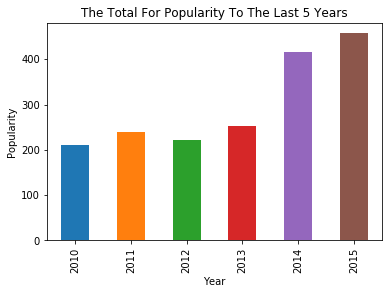

In [15]:
last_five_ye= df_a.groupby('release_year').popularity.sum().plot(kind= 'bar', title= 'The Total For Popularity To The Last 5 Years')
last_five_ye.set_xlabel("Year")
last_five_ye.set_ylabel("Popularity")


### From this figure,
We conclude that the last two years was the total popularity of films more. Where the year 2015 occupies the first place in popularity. This means that the popularity rate is increasing over time.






### Question 2 (What is the total of the average votes for the last 5 years?)

Text(0,0.5,'Average Votes')

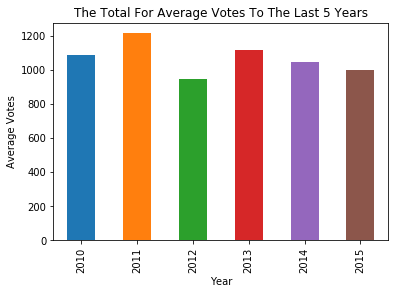

In [16]:
avg_votes_y= df_a.groupby('release_year').vote_average.sum().plot(kind= 'bar', title= 'The Total For Average Votes To The Last 5 Years')
avg_votes_y.set_xlabel("Year")
avg_votes_y.set_ylabel("Average Votes")

### From this figure,
In 2011, we see the highest total of average votes. Now we can see how the average votes are affected by the type of movies.

Text(0,0.5,'Average Votes')

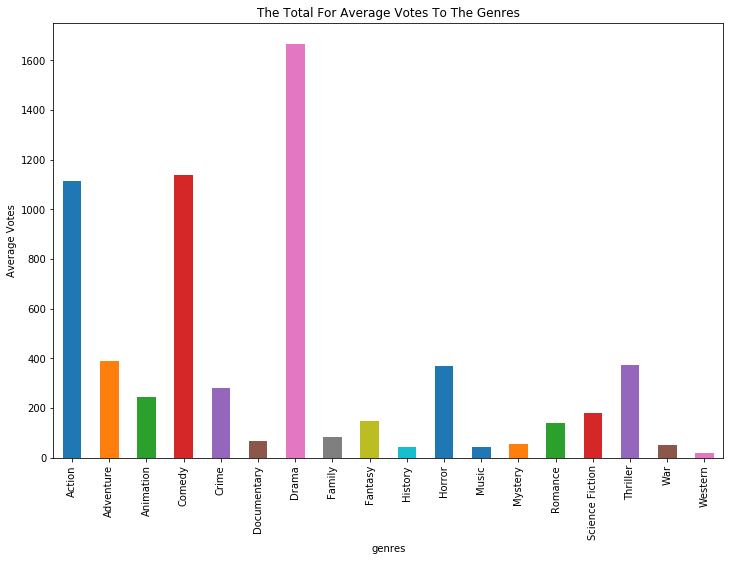

In [17]:
avg_votes_g= df_a.groupby('genres').vote_average.sum().plot(kind= 'bar', figsize=(12,8), title= 'The Total For Average Votes To The Genres')
avg_votes_g.set_xlabel("genres")
avg_votes_g.set_ylabel("Average Votes")



By calculating the total of average votes for each genre of movies. We find that the Drama ranked first with 4900 of the total average votes while the second place was for the comedy equivalent to 3500.

### Question 3 (For the last two years: What is the most productive genres? What is the rate of revenue per genres?)

Now we start copying data for the last two years.

In [18]:
df_last_two_y = df.query('release_year >= 2014')

Text(0,0.5,'genres')

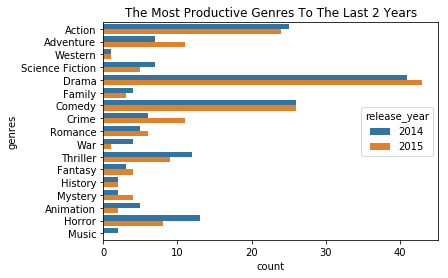

In [19]:
p = sns.countplot(data=df_last_two_y, y = 'genres',  hue = 'release_year')
p.set_title("The Most Productive Genres To The Last 2 Years")
p.set_xlabel("count")
p.set_ylabel("genres")

In this form we see that the rate of production of genre Drama increased during the two years. While the Comedy rate was steady during the two years.

Text(0.5,1,'The Rate of Revenue per Genres To The Last 2 Years')

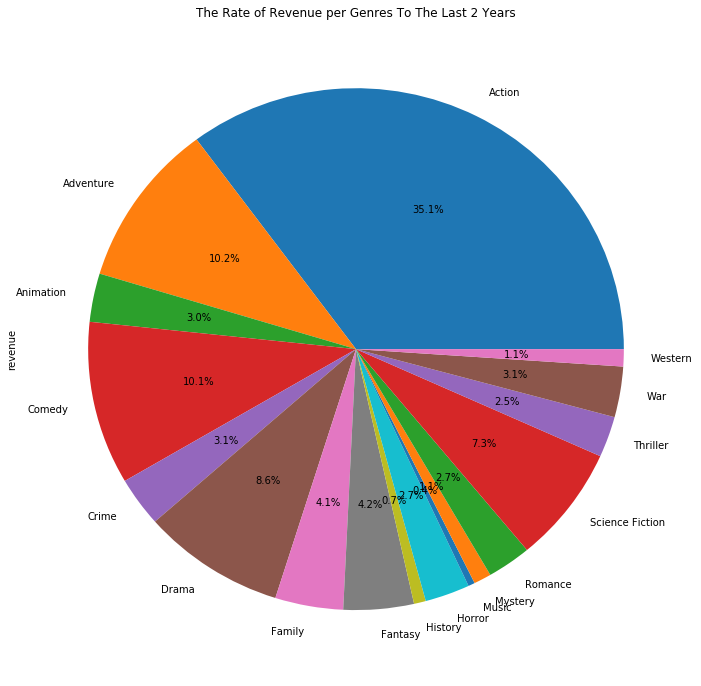

In [20]:
revenue_per_genres=df_last_two_y.groupby('genres').revenue.sum().plot(kind= 'pie', figsize=(12,12), autopct='%1.1f%%');
revenue_per_genres.set_title("The Rate of Revenue per Genres To The Last 2 Years")


This figure shows the Action ranked first at of 35.1% of revenues and
the Adventure ranked second at of 10.2%.

<a id='conclusions'></a>
## Conclusions

### Through analysis of the data we were able to answer our questions:
 1. The popularity rate has increased in the last five years.
 2. Through the average votes in the past five years, we found the highest average score in 2011. The highest genres   of votes was earned by the drama.
 3. Action and adventure are the highest in revenue for the last two years.


### Recommendations
At the beginning, we can not answer the questions before cleaning the lida. The data contains many missing values. Cleaning had to be done at the beginning.
We needed to split the column "genres" to improve our dealing with the primary type of movies.


However, the amount of data is not sufficient to prove the results for several reasons including:
1. An evolutionary leap from 2015 the last year has been counted to this day. Such as showing films in several countries at the same time as publishing and entering virtual world movies.
2. The amount of data lost was significant was observed in the column of "budget" where the budget of some films zero and this is illogical.




In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0